# Ford GoBike data exploration
## by Khaled Sherif


In [43]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
%matplotlib inline

# Investigation Overview

>In this analysis we want to find insights about the behaviour of the customers and the use of the service, in order to provide a better service for them and optimize the use of resources.

# Dataset Overview

>Our goal is to use a data of 3 million rows and 21 columns of trips made by users who used this service starting from 2017 to 2019 to find which features may affect the duration and distance covered in each trip and which time the service is being more often used.

In [44]:
df = pd.read_csv('Clean_FordGoBike_2017_2019.csv')

Data shape, info overview and comparison

In [45]:
#Dataset shape
df.shape

(3023992, 19)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023992 entries, 0 to 3023991
Data columns (total 19 columns):
bike_id                    int64
end_station_id             int64
end_station_latitude       float64
end_station_longitude      float64
start_station_id           int64
start_station_latitude     float64
start_station_longitude    float64
start_time                 object
low_income_trip            int64
subscriber                 int64
gender                     int64
duration_min               float64
user_age                   int64
year                       int64
month                      int64
week                       int64
day                        int64
weekday                    int64
hour                       int64
dtypes: float64(5), int64(13), object(1)
memory usage: 438.4+ MB


In [47]:
#Handling start_time column
df['start_time'] = pd.to_datetime(df['start_time'])

In [48]:
#Exploring time range of our data
df["start_time"].min(), df["start_time"].max()

(Timestamp('2017-06-28 09:47:36.347000'),
 Timestamp('2019-04-30 23:59:04.739000'))

In [49]:
#dropping low_income_trip column as its not useful in our analysis
df.drop('low_income_trip', axis=1, inplace=True)

# Adding new columns

3) column for season (by extracting it from date)[1] got it from stackoverflow \n
1.[https://stackoverflow.com/questions/60285557/extract-seasons-from-datetime-pandas]

In [50]:
#Adding Season column
df['season_name'] = (df['month']%12 + 3)//3
seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}

df['season'] = df['season_name'].map(seasons)
#dropping season as we made that column to be able to put rh season name

df.drop('season_name', axis=1, inplace = True)

#Adding start-end distance column
df['distance'] = np.sqrt((df["start_station_latitude"] - df["end_station_latitude"])**2 + (df["start_station_longitude"] - df["end_station_longitude"])**2)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023992 entries, 0 to 3023991
Data columns (total 20 columns):
bike_id                    int64
end_station_id             int64
end_station_latitude       float64
end_station_longitude      float64
start_station_id           int64
start_station_latitude     float64
start_station_longitude    float64
start_time                 datetime64[ns]
subscriber                 int64
gender                     int64
duration_min               float64
user_age                   int64
year                       int64
month                      int64
week                       int64
day                        int64
weekday                    int64
hour                       int64
season                     object
distance                   float64
dtypes: datetime64[ns](1), float64(6), int64(12), object(1)
memory usage: 461.4+ MB


In [52]:
df

,bike_id,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude,start_time,subscriber,gender,duration_min,user_age,year,month,week,day,weekday,hour,season,distance
0,96,43,37.778768,-122.415929,74,37.776435,-122.426244,2017-12-31 16:57:39.654,0,1,1335.2,31,2017,12,52,31,6,16,Winter,0.010575
1,88,96,37.766210,-122.426614,284,37.784872,-122.400876,2017-12-31 15:56:34.842,0,0,1313.3,53,2017,12,52,31,6,15,Winter,0.031792
2,3167,247,37.867789,-122.265896,239,37.868813,-122.258764,2017-12-31 14:23:14.001,1,0,726.7,21,2017,12,52,31,6,14,Winter,0.007205
3,3539,259,37.866249,-122.299371,259,37.866249,-122.299371,2017-12-31 23:49:28.422,0,0,75.1,27,2017,12,52,31,6,23,Winter,0.000000
4,2311,24,37.789677,-122.390428,67,37.776639,-122.395526,2017-12-31 23:52:55.581,1,1,36.4,28,2017,12,52,31,6,23,Winter,0.013999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023987,6430,132,37.751819,-122.426614,133,37.755213,-122.420975,2019-04-01 00:09:17.566,1,1,3.1,43,2019,4,14,1,0,0,Spring,0.006581
3023988,4972,77,37.773507,-122.416040,78,37.773717,-122.411647,2019-04-01 00:03:02.573,1,1,9.0,38,2019,4,14,1,0,0,Spring,0.004399
3023989,3415,269,37.862320,-122.258801,243,37.869360,-122.254337,2019-04-01 00:06:04.237,1,1,4.9,22,2019,4,14,1,0,0,Spring,0.008336
3023990,5018,43,37.778768,-122.415929,370,37.787327,-122.413278,2019-04-01 00:01:38.411,1,0,7.8,23,2019,4,14,1,0,0,Spring,0.008960


### What is the structure of your dataset?

> The dataset contains 3 mllion records of trips with 19 features ('bike_id', 'end_station_id', 'end_station_latitude',
       'end_station_longitude', 'start_station_id', 'start_station_latitude',
       'start_station_longitude', 'start_time', 'subscriber', 'gender',
       'duration_min', 'user_age', 'year', 'month', 'week', 'day', 'weekday',
       'hour', 'season') There are alot of categorical nominal data except for the coordinates and datetime columns

### What is/are the main feature(s) of interest in your dataset?

> I thing that period and categorical columns can help in finding interesting insights

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe that most of the categorical values, especially time columns can play an important role in explaining the consuming behaviour of fordgo service, also trip duration and destination distance may provide some interesting insights.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

# First: Numeric columns
Lets start by plotting the distributions of the numerical columns in the dataset duration_min, user_age, distance

In [53]:
numerical_columns = ['duration_min', 'user_age', 'distance']

def hist(column, bin_width):
    """
    plot a column distribution
    
    parameters:
    arg1 (string): column
    arg2 (int): bin_width
    
    Return a histogram of column
    """
    
    bins = np.arange(0, df[column].max()+5, bin_width)
    plt.xlabel(column)
    plt.hist(data = df, x = column, bins = bins);
    
    
def subplot(index):
    plt.figure(figsize = [20, 5]) 
    plt.subplot(1, len(numerical_columns), index) ;

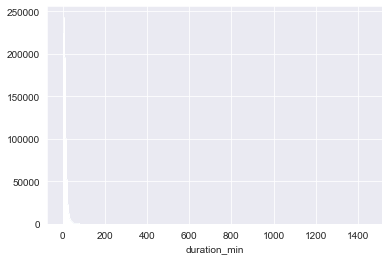

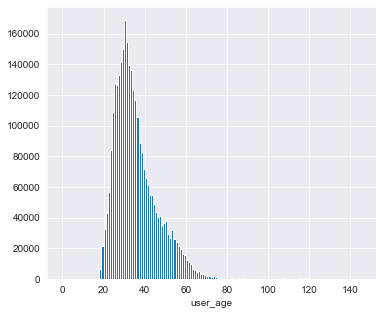

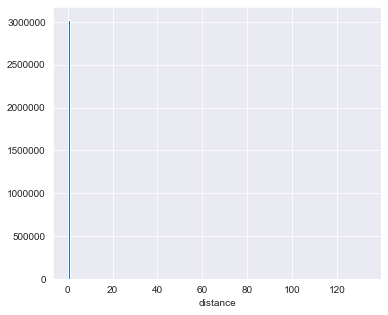

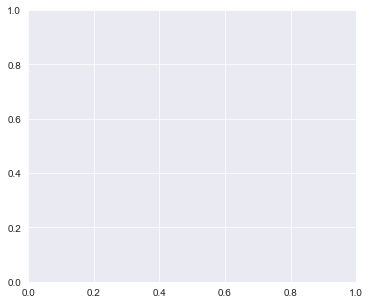

In [54]:
for i in numerical_columns:
    hist(i, 1)
    subplot(numerical_columns.index(i) + 1)
    

The first insights show that the distributions of the 3 columns are right skewed. <br> Lets see what we can do with each column alone to be able to explore its distribution better.

Duration_min <br>As we can see the distribution column has too few outliers that are too far from the distribution of the data and make the data extremely right skewed
We better realize the distribution of the data in numbers

In [55]:
# duration_min summaries
df['duration_min'].describe(percentiles=[.95])

count    3.023992e+06
mean     1.291231e+01
std      3.318015e+01
min      1.000000e+00
50%      9.000000e+00
95%      2.740000e+01
max      1.438000e+03
Name: duration_min, dtype: float64

# Distribution of duration of trips in minutes.

The distribution of the duration of the trips in minutes is left skewed even after removing the outliers, which is expected as the duration of most trips are usually between 5 and 15 minutes and the rest is above that.

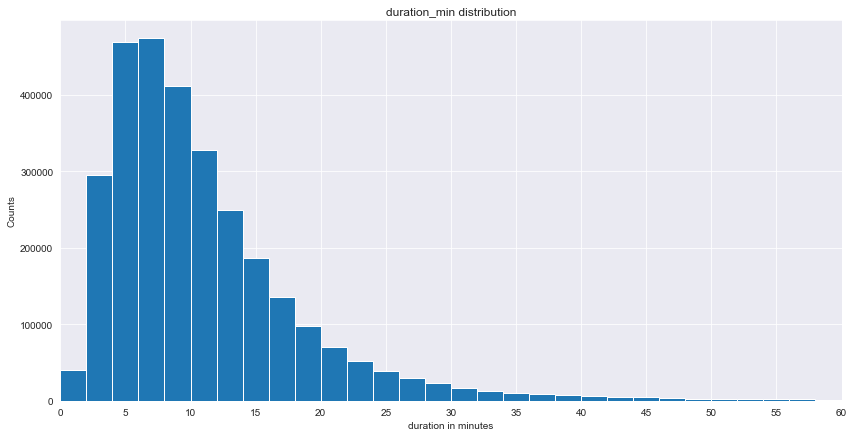

In [56]:
# duration_min column distribution
plt.figure(figsize=(14, 7))
bins = np.arange(0, df['duration_min'].max()+5, 2)
plt.xticks(np.arange(0, 65, 5))
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.title("duration_min distribution")
plt.xlabel('duration in minutes')
plt.ylabel('Counts')
plt.xlim(0,60);

Here we can see clearly the distribution of the duration of the trips in minutes we can notice that its still left skewed which is expected as most of the trips are usual between 5 and 15 minutes\n
now lets find out how we will plot the distributions of Age and distance column.

In [57]:
#user_age summaries
df['user_age'].describe(percentiles=[.98])

count    3.023992e+06
mean     3.500416e+01
std      1.038113e+01
min      1.800000e+01
50%      3.300000e+01
98%      6.100000e+01
max      1.410000e+02
Name: user_age, dtype: float64

As we notice most of ages of the users lies under age of 61 and too few people may be higher and there is an outlier in the age column which may exist due to some error, so we may need to drop all rows with users of age above 90

In [58]:
#dropping rows with age above 90
df = df[df['user_age'] < 90]
df.reset_index(inplace = True)

Lets figure out if that affected the column mean and then plot the distribution

In [59]:
df['user_age'].describe()

count    3.021715e+06
mean     3.494563e+01
std      1.016064e+01
min      1.800000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.000000e+01
max      8.900000e+01
Name: user_age, dtype: float64

 The mean didn't get affected almost(35)

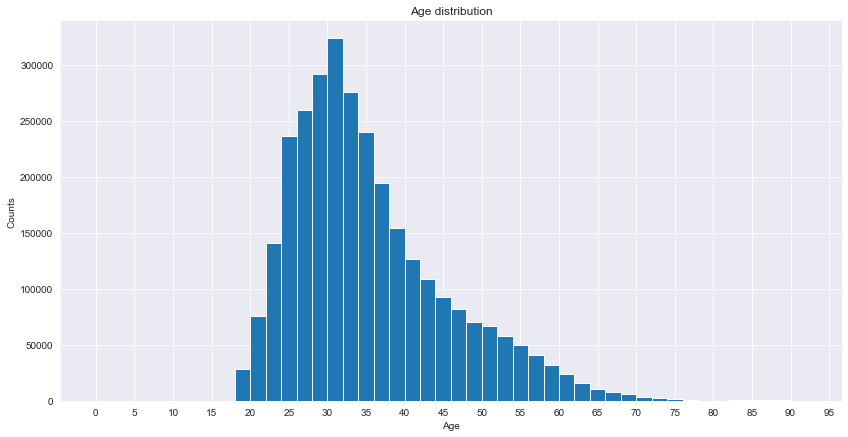

In [60]:
#user_age distribution
plt.figure(figsize=(14, 7))
bins = np.arange(0, df['user_age'].max()+5, 2)
plt.xticks(np.arange(0, 100, 5))
plt.title("Age distribution")
plt.xlabel('Age')
plt.ylabel('Counts')
plt.hist(data = df, x = 'user_age', bins = bins);

As we notice our data is left skewed which is expected as most of the service users are people between 20 and 40

now lets look at start-end distance column
note:this column don't represent the distance of the trip itself rather the distance between start and end stations for each trip which also could be a good indicator for the distance covered by in the trip.

In [61]:
df['distance'].describe(percentiles=[.9])

count    3.021715e+06
mean     1.711288e-02
std      3.213680e-01
min      0.000000e+00
50%      1.395396e-02
90%      3.052693e-02
max      1.281469e+02
Name: distance, dtype: float64

As we notice most values(around 90) in distance column lie under 0.03 and there are outliers in the dataset that reach 128.<br>
Also there a min distance of 0 but this is not an error this exist because som trips have the same start and end stations as people rented the bikes and returned them in the same stations where they took them. <br>So we may drop the outliers from the original dataset, then create a new dataset that don't have rows with same start-end destinations so we could see our distribution clearly.

In [62]:
# dropping outliers from distance row(distance above 0.05)
df = df[df['distance'] < 0.05]
#trips that don't have the same start-end stations
distance_destinations = df[df['distance'] > 0]
distance_destinations.shape

(2927416, 21)

In [63]:
#distance_destinations['distance'].describe()

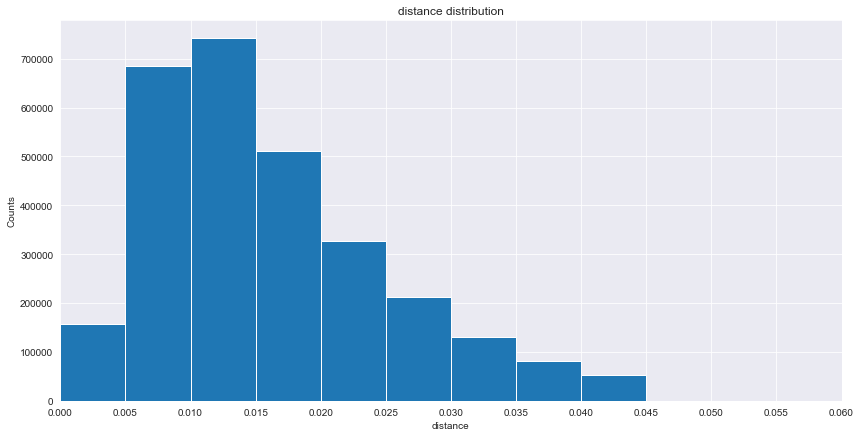

In [64]:
bins = np.arange(0, distance_destinations['distance'].max(), 0.005)
plt.figure(figsize=(14, 7))
plt.xticks(np.arange(0, 0.11, 0.005))
plt.title("distance distribution")
plt.xlabel('distance')
plt.ylabel('Counts')
plt.hist(data = distance_destinations, x = 'distance', bins = bins)
plt.xlim(0, 0.06);

As we can see the distribution is still rights skewed ( Which represents the nature of the distance column data).

# Second: Categorical columns
Now lets plot the counts of the Categorical columns and find out some interesting insights about the peak times daily, weekly, monthly and seasonaly.

In [65]:
# A function that return a countplot of a given column
def plot_counts(xlabel, ylabel, column, lables):
    
    """
    plot a column countplot
    
    parameters:
    arg1 (string): xlabel
    arg2 (string): ylabel
    arg3 (string): column name
    arg4 (list): list of label names that will replace int values(as most of categorical
    values are represented in int values)
    
    Return a countplot
    """
    plt.figure(figsize=(15, 8))
    plt.title(f"{column} distribution")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sb.countplot(data=df, x=column, color='darkblue').set(xticklabels=labels)

# The distribution of the trips per hour for each day.

>The use of the service start increasing from 7 am and start decreasing at 7 pm, and the peak of the service reach its highst point 2 times daily the first is at 8 am, and the second at 6 pm.

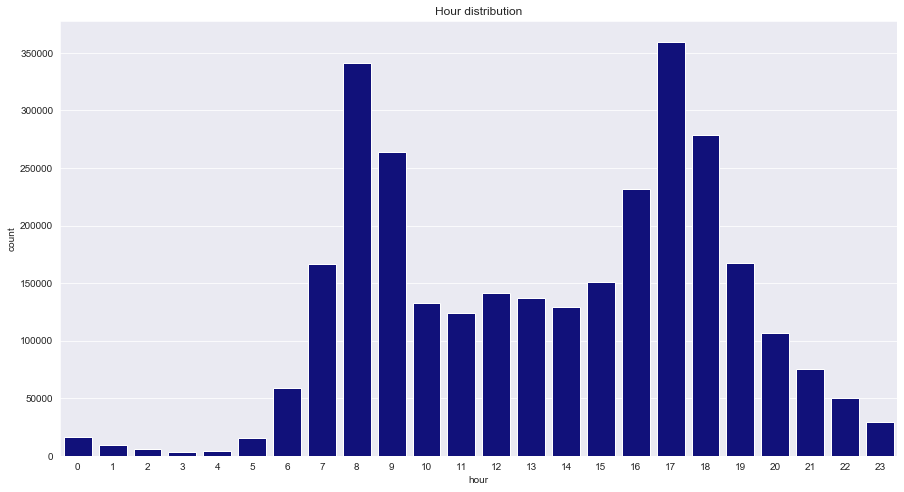

In [66]:
#Plotting daily peak(sum of counts of trips for each day for all rows)
plt.figure(figsize=(15, 8))
plt.title("Hour distribution")
plt.xlabel('Time')
plt.ylabel('Counts')
sb.countplot(data=df, x='hour', color='darkblue');



We can obviously recognize the daily peak of the trips, if we notice the peak occure 2 times daily the first is between 7 and 9 oclock, and the second time is between 4 and 7 daily

# The use of the service throughout the week days
>The use of the service decrease significantly at the weekend days(Saturday and Sunday).

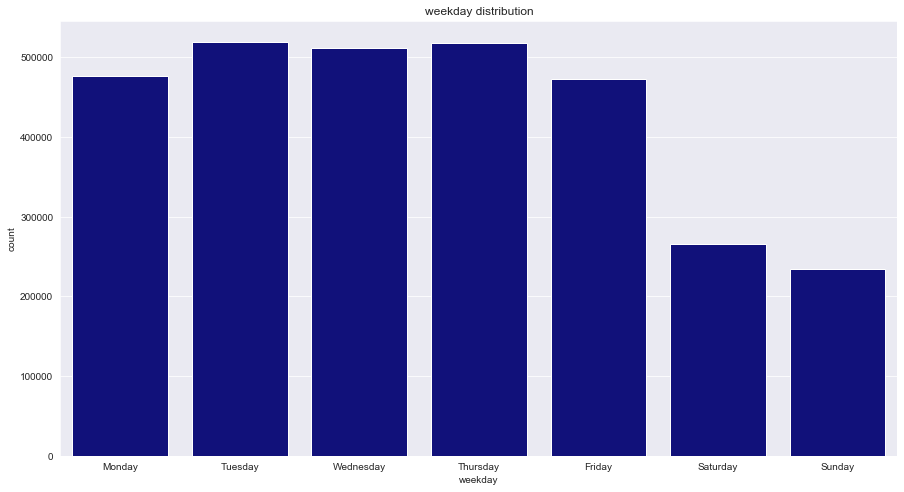

In [67]:
#Plotting weekly peak

labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plot_counts('Day_week', 'Counts', 'weekday', labels)

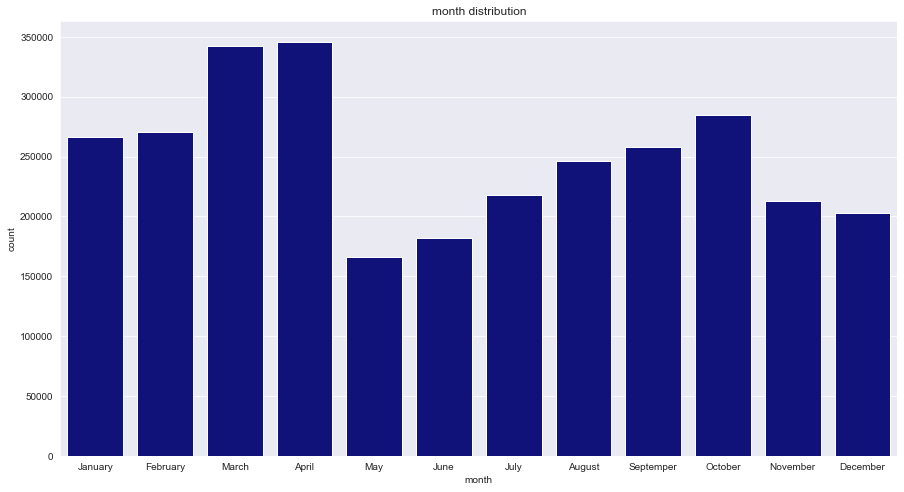

In [68]:
#Plotting monlthly peak
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'Septemper', 'October', 'November', 'December']
plot_counts('month', 'Counts', 'month', labels)

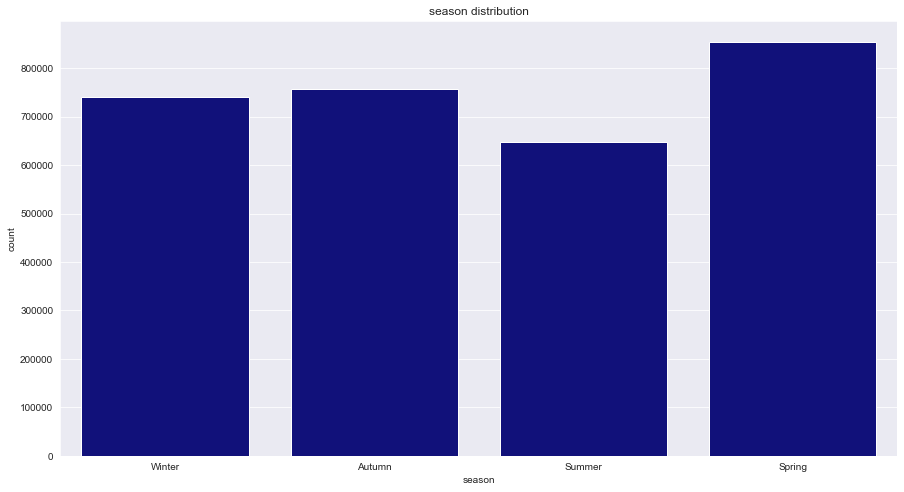

In [69]:
#Plotting counts of trips for each season
labels = df['season'].unique()
plot_counts('season', 'Counts', 'season', labels)

As we see number of trips for each season is almost the same, spring has the highst number of trips with a slight difference than the other 3 sasons.

We can notice that during the work days of the week(Monday to Friday) the count of the trips is almost the same(slight dfference), but for the weekend(Saturday and Sunday) we can realize a significant decrease in the number of trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> No thing unexpected until now most of the numeric distributions show right skewness as expected even after removing outlier as the nature of the distribution of these kinds of data tend to be right skewed most of the time.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I didn't perform any transformation on the data but I removed few outliers and set limits to the x label and that was enought to see the distributions of the data clearly.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Now lets explore the correlation between data by plotting a scatter plot of the data

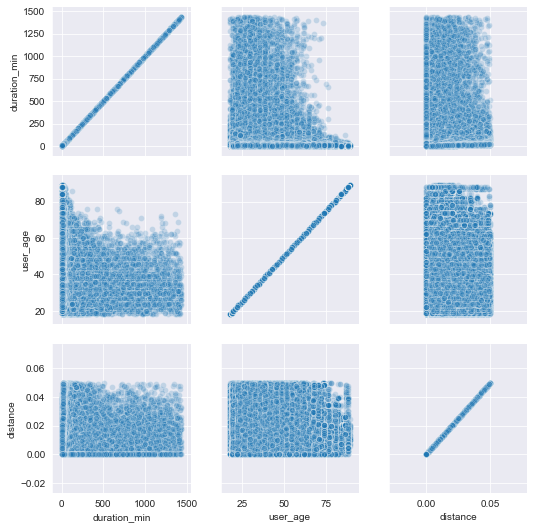

In [70]:
g = sb.PairGrid(df[['duration_min', 'user_age', 'distance']])
g.map(sb.scatterplot, alpha=0.2);

We can see from the plots that there is no any linear relations between the variables in the data lets see that better in numbers.

In [71]:
df[['duration_min', 'user_age', 'distance']].corr()

,duration_min,user_age,distance
duration_min,1.000000,-0.000093,0.111723
user_age,-0.000093,1.000000,-0.018513
distance,0.111723,-0.018513,1.000000


Also numbers show no corr between numerical variables in the data, which means, we can't depend on on numeric variable in estimating the other.

Now lets do somtheing interesting and find out which season has the highest dutarion and distance

In [72]:
def boxgrid_plot(x, y):
    ax = sb.catplot(x = x, y = y, kind="box", data = df)
    ax.fig.set_size_inches(10,4);
    ax.set(title = f'Avg {y} by {x}')
    ax.set(xlabel= x)
    ax.set(ylabel= f'Avg {y}')
    ax.set(ylim=(0,df[y].quantile(0.95)));

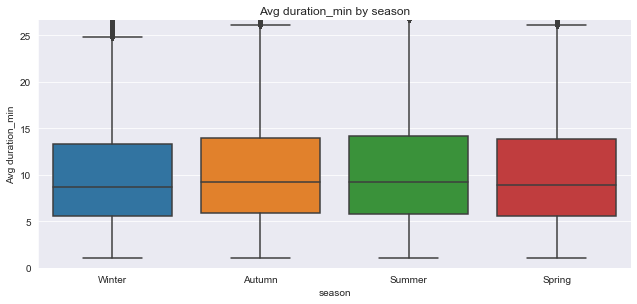

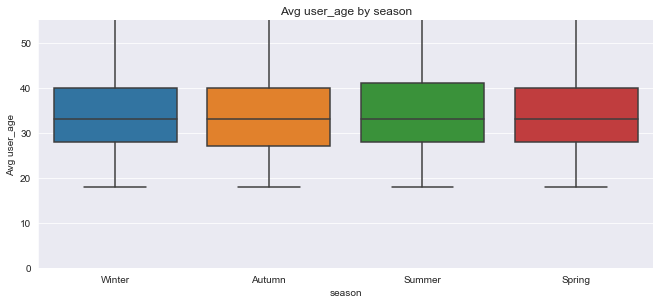

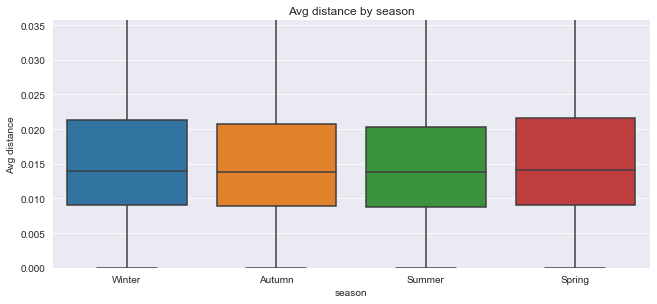

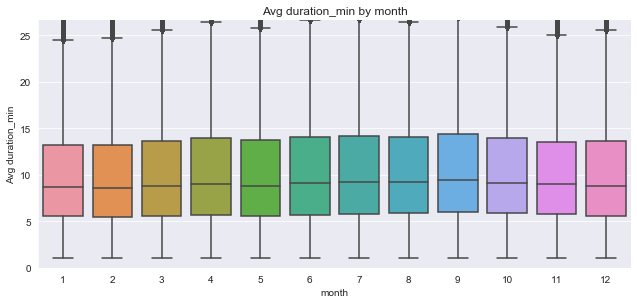

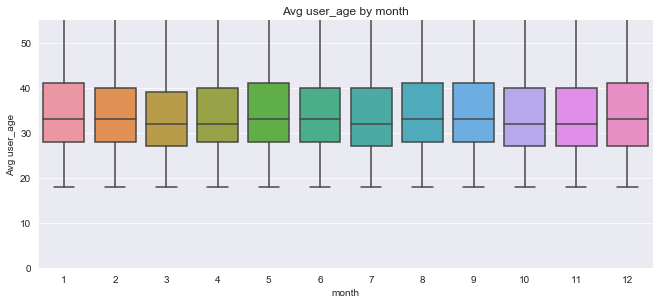

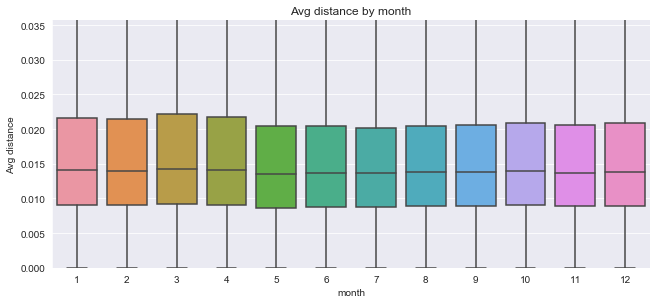

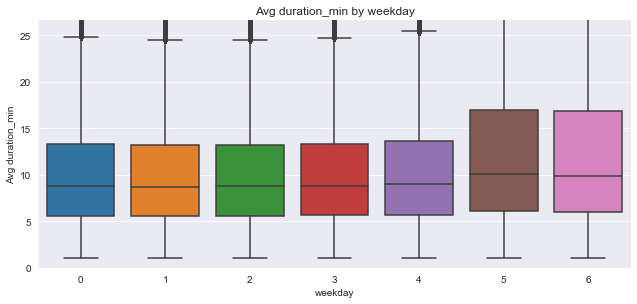

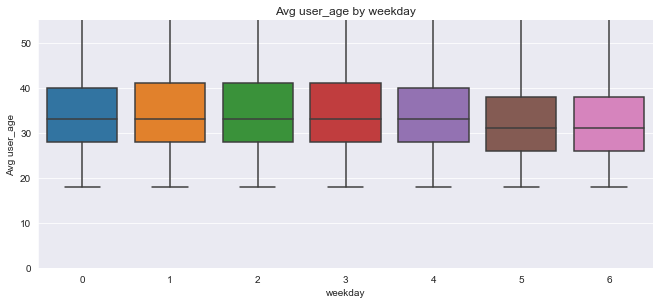

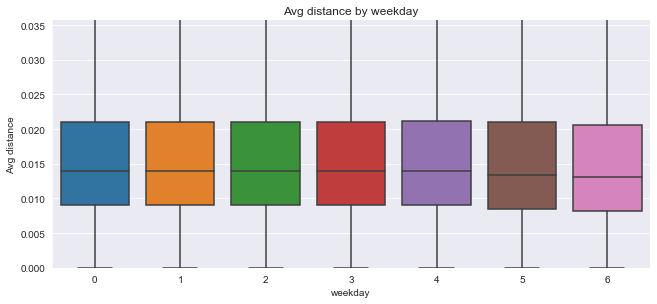

In [73]:
time_columns = ['season', 'month', 'weekday']
numeric_columns = ['duration_min', 'user_age', 'distance']
for x in time_columns:
    for y in numeric_columns:
        boxgrid_plot(x, y);

As we notice there are slight differences between box bars for categorical variables against nmeric values except for weeday against duration_min we see that at the weeend days(Saturday and Sunday) the duration of the trips are longer with a significant difference.

It will also be interesting to know if a numeric feature like user age affect the duration and distance of the trips so lets plot 2 other box plots to visualize that.

# Avg duration of trip for user age.

>The avg duration of trips of people of age 80 and 81 is significantly higher than the rest, that could be due to the lack of the data for the eldery people, as the low number of trips made by people at that age isn't enough to be representative for them.

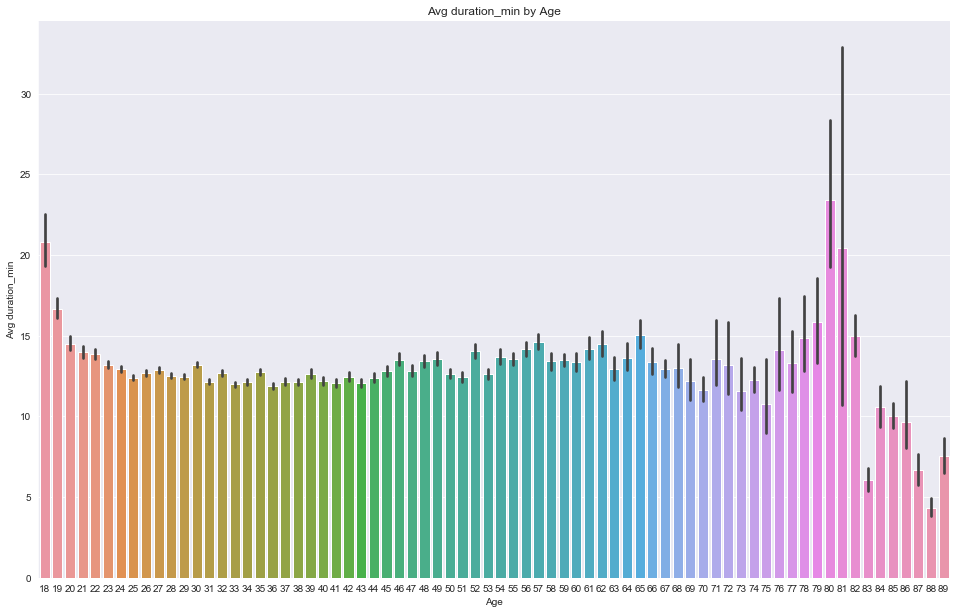

In [74]:
ax = sb.catplot(x = 'user_age', y = 'duration_min', kind="bar", data = df)
ax.fig.set_size_inches(15,9);
ax.set(title = 'Avg duration_min by Age')
ax.set(xlabel= 'Age')
ax.set(ylabel= 'Avg duration_min');

# Avg duration of trip for user age

> The avg distance of trips made by bikers is almost the same for most ages until 67 after that the avg distances vary and decrease.

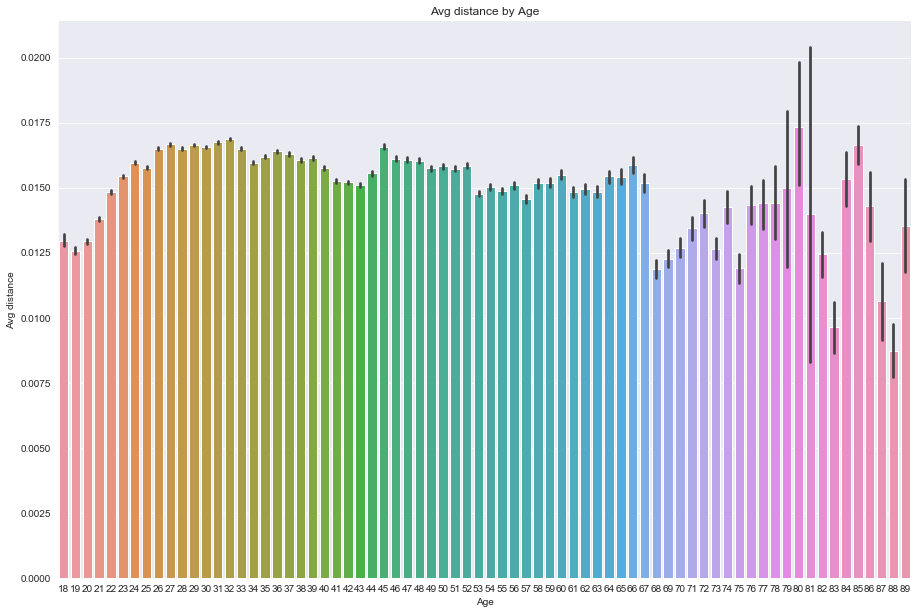

In [75]:
ax = sb.catplot(x = 'user_age', y = 'distance', kind="bar", data = df)
ax.fig.set_size_inches(15,9);
ax.set(title = 'Avg distance by Age')
ax.set(xlabel= 'Age')
ax.set(ylabel= 'Avg distance');

Here we can notice that the avg distance covered in the trips is almost the same for people between 22 and 67 and start to decrease after the age 67 unless for some ages where it inceases again.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The Boxplots show that weekend days have trips with a much higher avg duration than work days, also it shows that the avg distance covered in trips in March and April are slightly higher than other months. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 1) Trips avg duration of people of age 80 and 81 are significantly higher than the trips of bikers of other ages.<br>
2) Avg distance covered by people between age of 22 and  67 is very close(slight differences) and after that the avg distance start to decrease and vary.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Now lets try plotting the distribution of all stations based ono their coords and in respect to their frequency

In [76]:
# Making a new dataset of all unique rows for 'start_station_id' and adding each 'start_station_id' count as column
stations_counts = df.copy()
stations_counts['station_count'] = df.groupby(['start_station_id'])['start_station_latitude'].transform('count')
stations_counts = stations_counts.drop_duplicates(subset='start_station_id')
stations_counts

,index,bike_id,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude,start_time,subscriber,...,user_age,year,month,week,day,weekday,hour,season,distance,station_count
0,0,96,43,37.778768,-122.415929,74,37.776435,-122.426244,2017-12-31 16:57:39.654,0,...,31,2017,12,52,31,6,16,Winter,0.010575,17180
1,1,88,96,37.766210,-122.426614,284,37.784872,-122.400876,2017-12-31 15:56:34.842,0,...,53,2017,12,52,31,6,15,Winter,0.031792,16056
2,2,3167,247,37.867789,-122.265896,239,37.868813,-122.258764,2017-12-31 14:23:14.001,1,...,21,2017,12,52,31,6,14,Winter,0.007205,18495
3,3,3539,259,37.866249,-122.299371,259,37.866249,-122.299371,2017-12-31 23:49:28.422,0,...,27,2017,12,52,31,6,23,Winter,0.000000,4107
4,4,2311,24,37.789677,-122.390428,67,37.776639,-122.395526,2017-12-31 23:52:55.581,1,...,28,2017,12,52,31,6,23,Winter,0.013999,63787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797798,2799968,1435,98,37.765052,-122.421866,410,37.750200,-122.386567,2019-04-30 13:37:55.268,1,...,29,2019,4,18,30,1,13,Spring,0.038296,27
2798707,2800878,830,361,37.739853,-122.385655,412,37.732813,-122.434140,2019-04-30 10:18:23.238,0,...,29,2019,4,18,30,1,10,Spring,0.048993,68
2802523,2804697,2530,276,37.332233,-121.912516,405,37.323451,-121.905976,2019-04-29 18:39:52.860,0,...,31,2019,4,18,29,0,18,Spring,0.010949,43
2804702,2806877,3788,282,37.332426,-121.890349,418,37.343985,-121.874385,2019-04-29 14:56:40.019,0,...,29,2019,4,18,29,0,14,Spring,0.019709,8


plotting a scatter plot of each station_ using coords(lat and long) and adjusting the size of each point ti its count in df

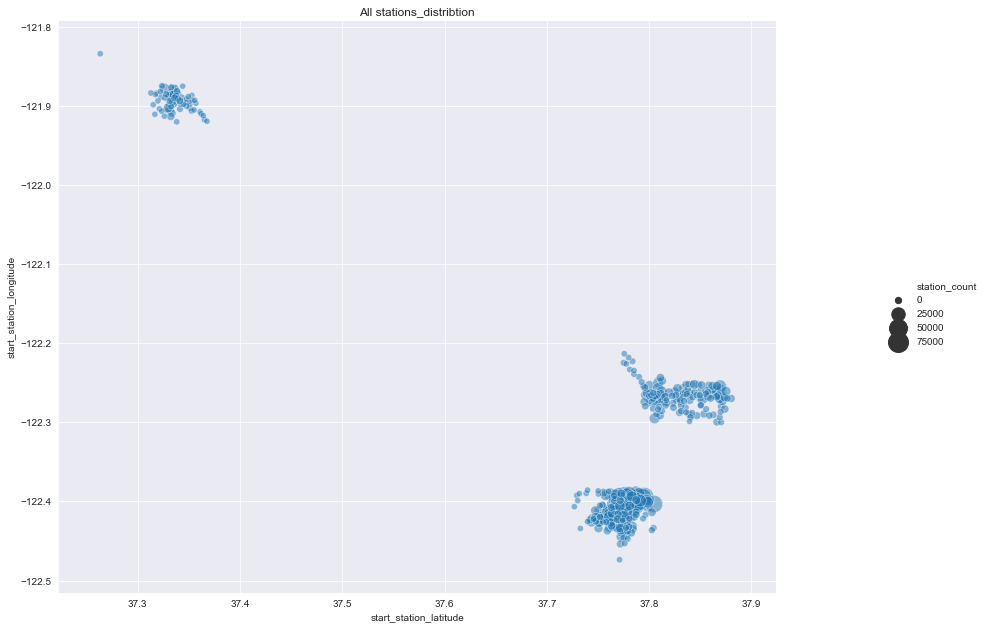

In [77]:
#Scatter plot of stations
ax = sb.set_style("darkgrid")
ax =sb.relplot(x="start_station_latitude", y="start_station_longitude", size='station_count',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=stations_counts)
ax.fig.set_size_inches(15,9)
ax.set(title = 'All stations_distribtion');

# Avg duration per month for each year.

The timeseries plot for the avg duration of trips per month for rach year show significant increase in trips duration between June and September.

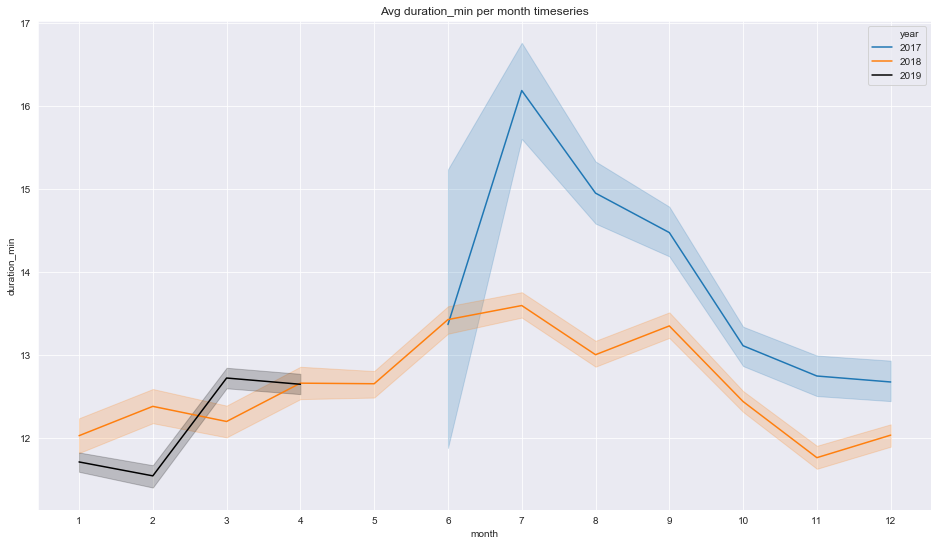

In [78]:
# Plotting atime series of the avg duration_min per month for all years. 
fig_dims = (16, 9)
fig, ax = plt.subplots(figsize=fig_dims)
sb.lineplot(x="month", y="duration_min", data=df, hue='year', palette=["C0", "C1", "k"])
ax.set_xticks(np.arange(1, 13, 1))
plt.title('Avg duration_min per month timeseries')
plt.show()

As we see the year 2017 started from month 6 and the year 2019 end at month 4 as our data ranges between these dates.<br>
Here we can noice that the avg duaration_min for 2 years(2017,2018) reached a high point between month 6 and 9 and its highst point at month 7. Which means that for some reason people take longer time in thier trips in this period of the year.

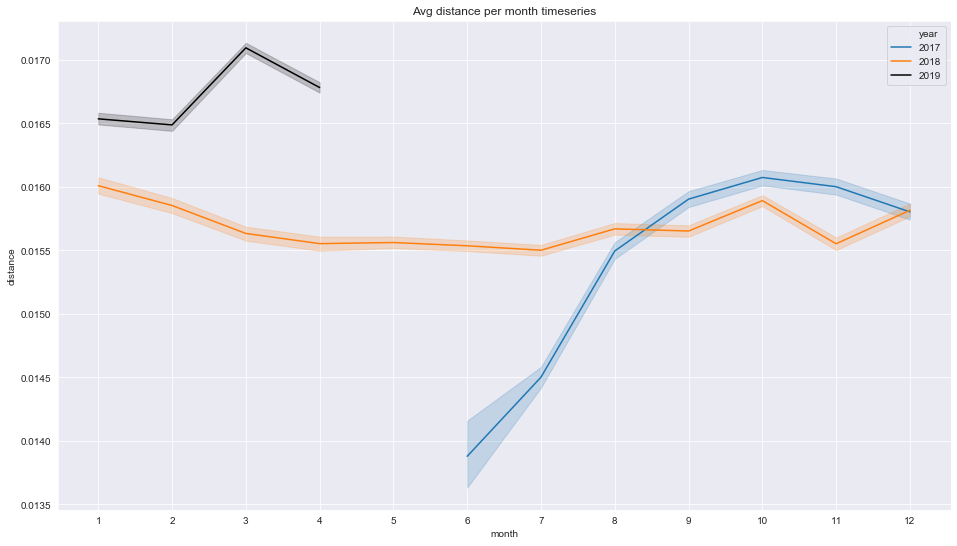

In [79]:
# Plotting a time series of the avg distance per month for all years. 
fig_dims = (16, 9)
fig, ax = plt.subplots(figsize=fig_dims)
sb.lineplot(x='month', y='distance', data=df, hue='year', palette=["C0", "C1", "k"])
ax.set_xticks(np.arange(1, 13, 1))
plt.title('Avg distance per month timeseries')
plt.show()

There is nothing remarkable for the avg distance but we can notice that for the short period in year 2019 the avg distance covered was higher than the avg distance covered for all time in the other both years.

# Comparison regarding duration and covered distance for gender.

>The timeseries plots of the avg duration and distance of trips per month for each gender show that males take much less in thier distances and bike for longer distances than females, that could be related to gender behaviour.

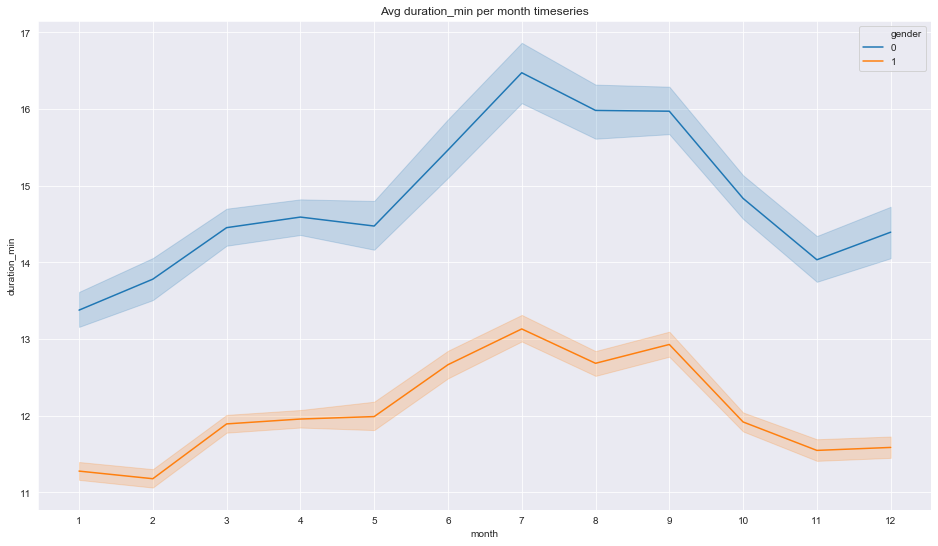

In [80]:
# Plotting a line of the avg duration_min of trips per month for each gender. 
fig_dims = (16, 9)
fig, ax = plt.subplots(figsize=fig_dims)
sb.lineplot(x="month", y="duration_min", data=df, hue='gender', palette=["C0", "C1"])
ax.set_xticks(np.arange(1, 13, 1))
plt.title('Avg duration_min per month timeseries')
plt.show()

We can obviously see that trips of females had a longer duration than the trips of males and both had a high duration between July and Septemper.

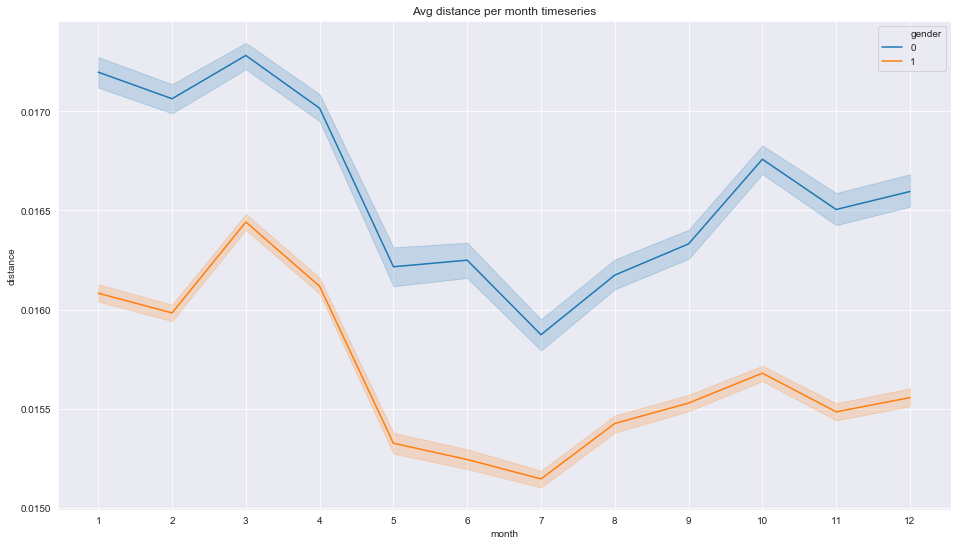

In [81]:
# Plotting a line of the avg distance of trips per month for each gender. 
fig_dims = (16, 9)
fig, ax = plt.subplots(figsize=fig_dims)
sb.lineplot(x="month", y="distance", data=df, hue='gender', palette=["C0", "C1"])
ax.set_xticks(np.arange(1, 13, 1))
plt.title('Avg distance per month timeseries')
plt.show()

The above lineplot indicates also that males cover longer distances in their trips than females

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The last 2 line plots showed that males spend less time than females in their trips althouth they take trips with longer distances, that indicate that males drive bikes much faster than females which could be something related to the gender behaviour.

### Were there any interesting or surprising interactions between features?

> The line plots for the years showed that the duration of trips between the months 7 and 9 are obviously higher than the rest of the yeat, that may have something to do with the traffic or some other reasons, it may be something that can't be explained only with the available data.

In [88]:
!jupyter nbconvert exploration_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook exploration_slide_deck.ipynb to slides
[NbConvertApp] Writing 652514 bytes to exploration_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
